In [30]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from scipy.io.wavfile import write

# Cargar el archivo de audio
audio_path = r"/home/alvaroglezeri/SoundLight/resources/CamelPhat, Yannis, Foals - Hypercolour.wav"
y, sr = librosa.load(audio_path)


In [31]:

# Detectar pitch (frecuencia fundamental)
fmin=librosa.note_to_hz('C2')
fmax=librosa.note_to_hz('C7')
f0, voiced_flag, voiced_probs = librosa.pyin(y, sr=sr, fmin=fmin, fmax=fmax)


In [32]:
# Filtrar NaN de f0
f0_clean = f0[~np.isnan(f0)]  # Eliminar valores NaN
times_clean = librosa.times_like(f0, sr=sr)[~np.isnan(f0)]  # Obtener los tiempos sin NaN
f0 = f0_clean


In [33]:

# Convertir frecuencias a notas musicales
notas = librosa.hz_to_note(f0)


In [34]:

# Calcular el volumen (RMS)
rms = librosa.feature.rms(y=y)[0]


In [35]:

# Obtener los tiempos correspondientes a cada frame de pitch
times = librosa.times_like(f0, sr=sr)


In [36]:

# Filtrar las notas que son voiced
notas_voiced = notas[voiced_flag]
times_voiced = times[voiced_flag]
volumen_voiced = rms[voiced_flag]


IndexError: boolean index did not match indexed array along axis 0; size of axis is 4088 but size of corresponding boolean axis is 9006

In [37]:

# Imprimir las notas con tiempo de inicio y volumen
for i in range(len(notas_voiced)):
    print(f"Nota: {notas_voiced[i]}, Tiempo de inicio: {times_voiced[i]:.2f} s, Volumen: {volumen_voiced[i]:.2f}")


NameError: name 'notas_voiced' is not defined

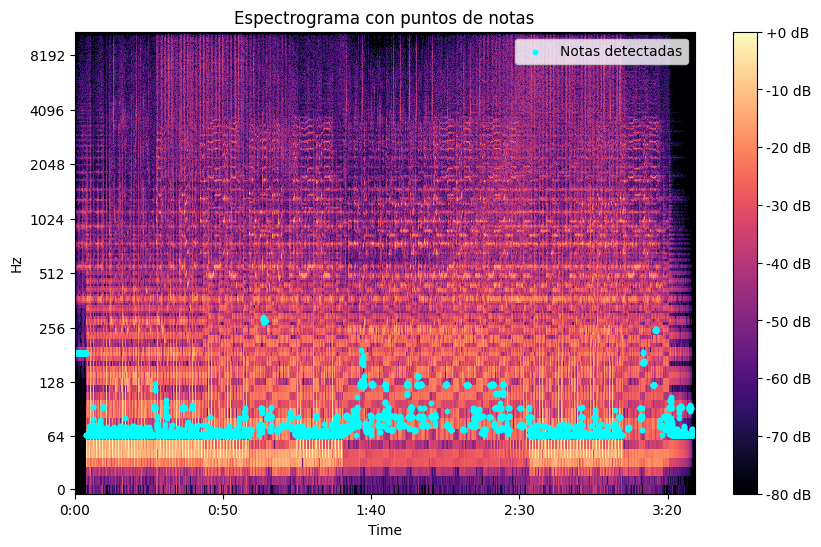

In [38]:
# ------------------ Visualización del espectrograma con puntos de color ------------------

# Calcular el espectrograma
S = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Graficar el espectrograma
plt.figure(figsize=(10, 6))
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma con puntos de notas')

# Dibujar puntos en las posiciones de las notas detectadas
plt.scatter(times_clean, f0_clean, color='cyan', s=10, label="Notas detectadas")

# Mostrar el gráfico
plt.legend(loc='upper right')
plt.show()

In [40]:
# ------------------ Sonificación de las notas detectadas ------------------

# Crear señal de audio con las frecuencias detectadas
duration_per_note = 0.05  # Duración de cada nota en segundos (puedes ajustarlo)
output_audio = np.zeros(int(sr * len(notas) * duration_per_note))

for i, freq in enumerate(f0_clean):
    if freq > 0:  # Solo generamos sonido si hay una frecuencia válida
        # Generar la señal sinusoidal para esa frecuencia
        t = np.linspace(0, duration_per_note, int(sr * duration_per_note), False)
        wave = 0.5 * np.sin(2 * np.pi * freq * t)
        # Insertar la onda generada en la señal de salida
        output_audio[i * len(t):(i + 1) * len(t)] = wave

# Guardar el archivo de audio generado
output_audio_path = 'notas_sonificadas.wav'
write(output_audio_path, sr, (output_audio * 32767).astype(np.int16))  # Convertir a 16-bit PCM
print(f"Archivo de audio generado: {output_audio_path}")

Archivo de audio generado: notas_sonificadas.wav
